**1.Manejo de Archivos**

In [36]:
import pandas as pd
import os

file_path = '/content/wisconsin_breast_cancer.csv'

if os.path.exists(file_path):
    data = pd.read_csv(file_path)
    print("Primeras 5 filas:")
    print(data.head())
    thickness_data = data['thickness']
    print(f"\nEstadísticas de thickness:")
    print(f"Cantidad: {len(thickness_data)}")
    print(f"Suma: {thickness_data.sum()}")
    print(f"Promedio: {thickness_data.mean()}")
    print(f"Varianza: {thickness_data.var()}")
else:
    print("Error: Sube wisconsin_breast_cancer.csv a /content/")

Primeras 5 filas:
        id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
0  1000025          5     1      1         1       2     1.0          3   
1  1002945          5     4      4         5       7    10.0          3   
2  1015425          3     1      1         1       2     2.0          3   
3  1016277          6     8      8         1       3     4.0          3   
4  1017023          4     1      1         3       2     1.0          3   

   nucleoli  mitosis  class  
0         1        1      0  
1         2        1      0  
2         1        1      0  
3         7        1      0  
4         1        1      0  

Estadísticas de thickness:
Cantidad: 699
Suma: 3088
Promedio: 4.417739628040057
Varianza: 7.928395456464613


**2. Expresiones Regulares con Archivos**

In [37]:
import numpy as np

print("Valores en 'nuclei' antes:")
print(data['nuclei'].unique())

data['nuclei'] = data['nuclei'].fillna(data['nuclei'].median())

print("\nValores en 'nuclei' después:")
print(data['nuclei'].unique())

Valores en 'nuclei' antes:
[ 1. 10.  2.  4.  3.  9.  7. nan  5.  8.  6.]

Valores en 'nuclei' después:
[ 1. 10.  2.  4.  3.  9.  7.  5.  8.  6.]


**3. Creación de un Arreglo**

In [38]:
import numpy as np

thickness_array = np.array(data['thickness'])

print(f"Arreglo de thickness: {thickness_array[:5]}...")
print(f"Máximo: {thickness_array.max()}")
print(f"Mínimo: {thickness_array.min()}")
print(f"Desviación estándar: {thickness_array.std()}")

Arreglo de thickness: [5 5 3 6 4]...
Máximo: 10
Mínimo: 1
Desviación estándar: 2.8137258170785375


**4. Manipulación de Matrices**

In [39]:
import numpy as np

matrix = np.array(data[['thickness', 'size', 'shape']])
matrix_transpose = matrix.T

print(f"Matriz original (primeras 5 filas):\n{matrix[:5]}")
print(f"\nMatriz transpuesta:\n{matrix_transpose[:, :5]}")

Matriz original (primeras 5 filas):
[[5 1 1]
 [5 4 4]
 [3 1 1]
 [6 8 8]
 [4 1 1]]

Matriz transpuesta:
[[5 5 3 6 4]
 [1 4 1 8 1]
 [1 4 1 8 1]]


**5. Máscaras Booleanas**

In [40]:
malignant_mask = data['class'] == 1
malignant_data = data[malignant_mask]

print(f"Número de tumores malignos: {len(malignant_data)}")
print("Primeras 5 filas malignas:")
print(malignant_data.head())

Número de tumores malignos: 241
Primeras 5 filas malignas:
         id  thickness  size  shape  adhesion  single  nuclei  chromatin  \
5   1017122          8    10     10         8       7    10.0          9   
12  1041801          5     3      3         3       2     3.0          4   
14  1044572          8     7      5        10       7     9.0          5   
15  1047630          7     4      6         4       6     1.0          4   
18  1050670         10     7      7         6       4    10.0          4   

    nucleoli  mitosis  class  
5          7        1      1  
12         4        1      1  
14         5        4      1  
15         3        1      1  
18         1        2      1  


**6. Librería Pandas**

In [41]:
print("Información del dataset:")
print(data.info())

print("\nEstadísticas descriptivas:")
print(data.describe())

print("\nValores faltantes:")
print(data.isnull().sum())

Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         699 non-null    int64  
 1   thickness  699 non-null    int64  
 2   size       699 non-null    int64  
 3   shape      699 non-null    int64  
 4   adhesion   699 non-null    int64  
 5   single     699 non-null    int64  
 6   nuclei     699 non-null    float64
 7   chromatin  699 non-null    int64  
 8   nucleoli   699 non-null    int64  
 9   mitosis    699 non-null    int64  
 10  class      699 non-null    int64  
dtypes: float64(1), int64(10)
memory usage: 60.2 KB
None

Estadísticas descriptivas:
                 id   thickness        size       shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
std    6.170957e+05    2.815741    3.051459    2.971

**7. Matplotlib**

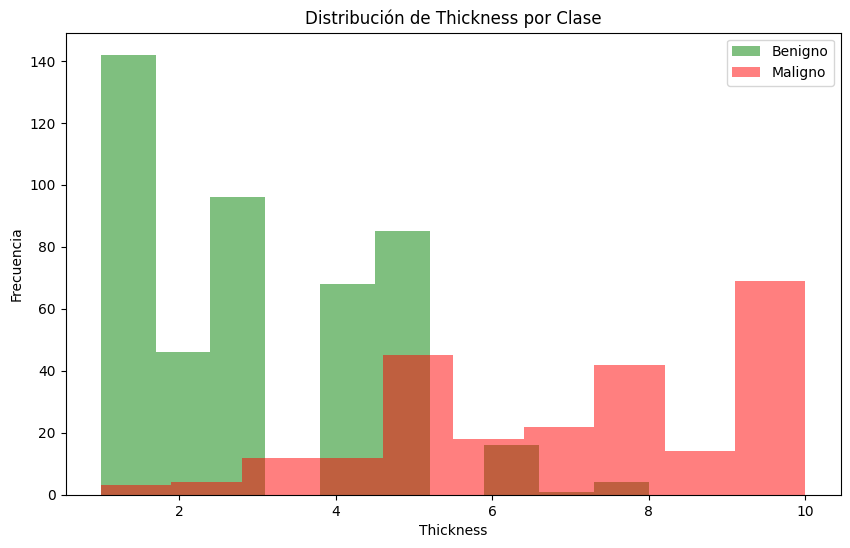

In [42]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(data[data['class'] == 0]['thickness'], bins=10, alpha=0.5, label='Benigno', color='green')
plt.hist(data[data['class'] == 1]['thickness'], bins=10, alpha=0.5, label='Maligno', color='red')
plt.title('Distribución de Thickness por Clase')
plt.xlabel('Thickness')
plt.ylabel('Frecuencia')
plt.legend()
plt.show()

**8. Seaborn**

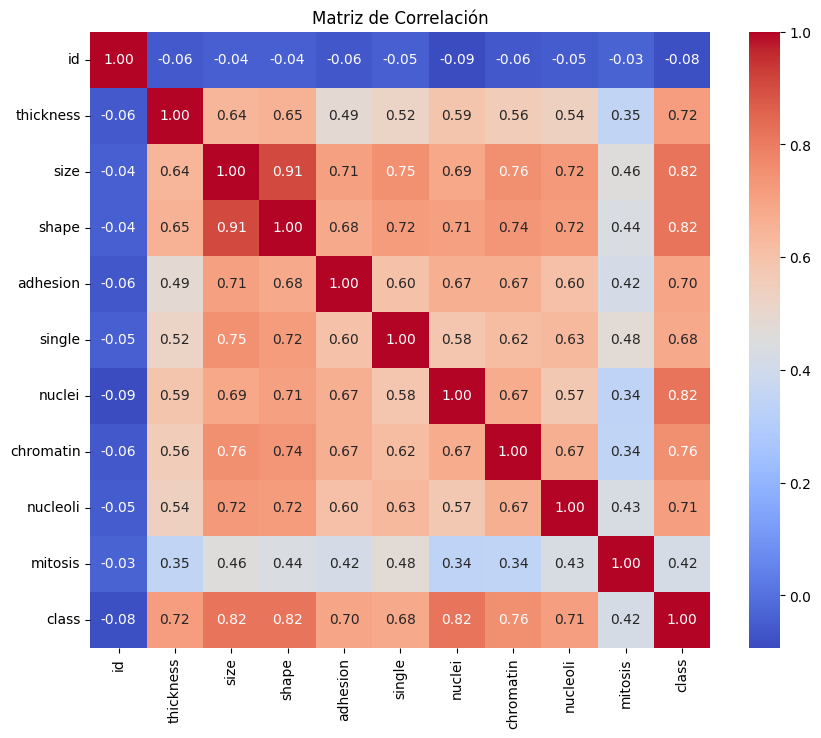

<ipython-input-43-233a735767e0>:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




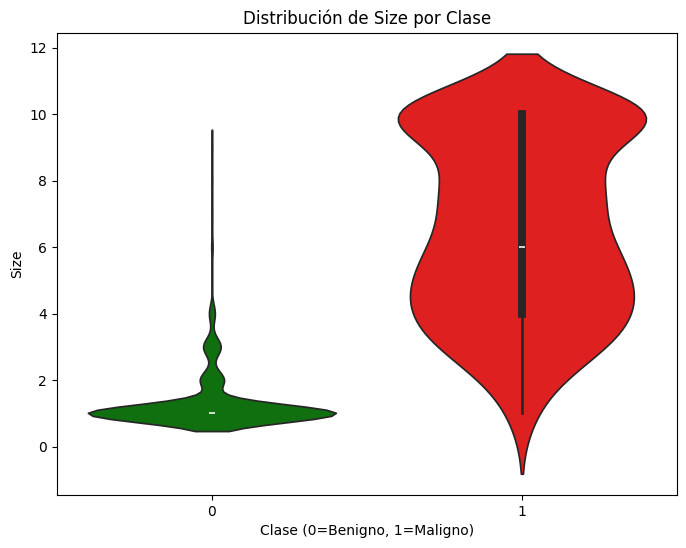

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación')
plt.show()

plt.figure(figsize=(8, 6))
sns.violinplot(x='class', y='size', data=data, palette=['green', 'red'])
plt.title('Distribución de Size por Clase')
plt.xlabel('Clase (0=Benigno, 1=Maligno)')
plt.ylabel('Size')
plt.show()

**9. Plotly.Express Dispersión**

In [44]:
import plotly.express as px

fig = px.scatter(data, x='thickness', y='size', color='class',
                 title='Thickness vs Size por Clase',
                 labels={'class': 'Clase (0=Benigno, 1=Maligno)'},
                 color_continuous_scale=['green', 'red'])
fig.show()

**10. Plotly Histogramas**

In [45]:
import plotly.express as px

fig = px.histogram(data, x='shape', color='class', barmode='overlay',
                   title='Distribución de Shape por Clase',
                   labels={'class': 'Clase (0=Benigno, 1=Maligno)'},
                   opacity=0.5)
fig.show()

**11. Plotly Líneas**

In [46]:
import plotly.express as px

data_temp = data.copy()
data_temp['id_group'] = pd.cut(data_temp['id'], bins=10)
data_temp['id_group'] = data_temp['id_group'].astype(str)
group_means = data_temp.groupby('id_group', observed=True)['thickness'].mean().reset_index()

fig = px.line(group_means, x='id_group', y='thickness',
              title='Promedio de Thickness por Grupo de ID')
fig.show()

**12. Mapa de Calor Plotly**

In [47]:
import plotly.graph_objects as go

corr_matrix = data.corr()
fig = go.Figure(data=go.Heatmap(
    z=corr_matrix.values,
    x=corr_matrix.columns,
    y=corr_matrix.columns,
    colorscale='RdBu',
    zmin=-1, zmax=1))
fig.update_layout(title='Mapa de Calor de Correlaciones')
fig.show()

**13. Boxplot Plotly**

In [48]:
import plotly.express as px

fig = px.box(data, x='class', y='thickness',
             title='Boxplot de Thickness por Clase',
             labels={'class': 'Clase (0=Benigno, 1=Maligno)', 'thickness': 'Thickness'})
fig.show()

**14. Datos Categóricos**

In [49]:
data['class_label'] = data['class'].map({0: 'Benigno', 1: 'Maligno'}).astype('category')

print("Frecuencia de class_label:")
print(data['class_label'].value_counts())

data['class_grouped'] = data['class_label']
print("\nFrecuencia de class_grouped:")
print(data['class_grouped'].value_counts())

Frecuencia de class_label:
class_label
Benigno    458
Maligno    241
Name: count, dtype: int64

Frecuencia de class_grouped:
class_grouped
Benigno    458
Maligno    241
Name: count, dtype: int64


**15. Datos Temporales**

In [50]:
from datetime import datetime, timedelta

base_date = datetime(2020, 1, 1)
data['fict_date'] = [base_date + timedelta(days=int(id % 1000)) for id in data['id']]

data['year'] = data['fict_date'].dt.year
data['month'] = data['fict_date'].dt.month
data['day'] = data['fict_date'].dt.day

print("Primeras filas con fechas:")
print(data[['fict_date', 'year', 'month', 'day']].head())

data['fict_date_shifted'] = data['fict_date'] + pd.Timedelta(days=10, hours=7, minutes=15)
print("\nFechas desplazadas:")
print(data[['fict_date', 'fict_date_shifted']].head())

Primeras filas con fechas:
   fict_date  year  month  day
0 2020-01-26  2020      1   26
1 2022-08-03  2022      8    3
2 2021-03-01  2021      3    1
3 2020-10-04  2020     10    4
4 2020-01-24  2020      1   24

Fechas desplazadas:
   fict_date   fict_date_shifted
0 2020-01-26 2020-02-05 07:15:00
1 2022-08-03 2022-08-13 07:15:00
2 2021-03-01 2021-03-11 07:15:00
3 2020-10-04 2020-10-14 07:15:00
4 2020-01-24 2020-02-03 07:15:00


**16. Duplicados**

In [51]:
print(f"Filas duplicadas: {data.duplicated().sum()}")

print("\nDuplicados en ['thickness', 'size', 'shape']:")
print(data.duplicated(subset=['thickness', 'size', 'shape']).sum())

data_temp = data.drop_duplicates()
print(f"\nFilas tras eliminar duplicados: {len(data_temp)}")

Filas duplicadas: 9

Duplicados en ['thickness', 'size', 'shape']:
493

Filas tras eliminar duplicados: 690


**18. EDA 1**

Estadísticas descriptivas:
                 id   thickness        size       shape    adhesion  \
count  6.990000e+02  699.000000  699.000000  699.000000  699.000000   
mean   1.071704e+06    4.417740    3.134478    3.207439    2.806867   
min    6.163400e+04    1.000000    1.000000    1.000000    1.000000   
25%    8.706885e+05    2.000000    1.000000    1.000000    1.000000   
50%    1.171710e+06    4.000000    1.000000    1.000000    1.000000   
75%    1.238298e+06    6.000000    5.000000    5.000000    4.000000   
max    1.345435e+07   10.000000   10.000000   10.000000   10.000000   
std    6.170957e+05    2.815741    3.051459    2.971913    2.855379   

           single      nuclei   chromatin    nucleoli     mitosis       class  \
count  699.000000  699.000000  699.000000  699.000000  699.000000  699.000000   
mean     3.216023    3.486409    3.437768    2.866953    1.589413    0.344778   
min      1.000000    1.000000    1.000000    1.000000    1.000000    0.000000   
25%      

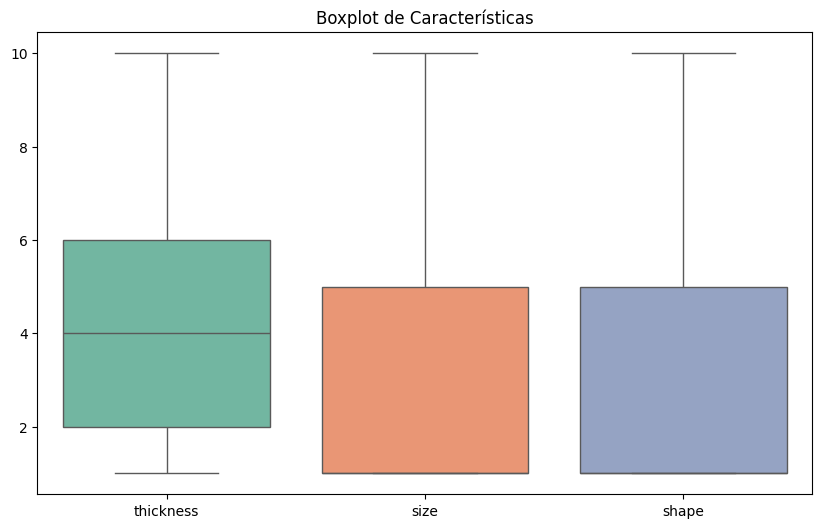


Prueba de Shapiro-Wilk para thickness:
Estadístico: 0.9021958679893232, p-valor: 1.0073174108085305e-20


<Figure size 600x600 with 0 Axes>

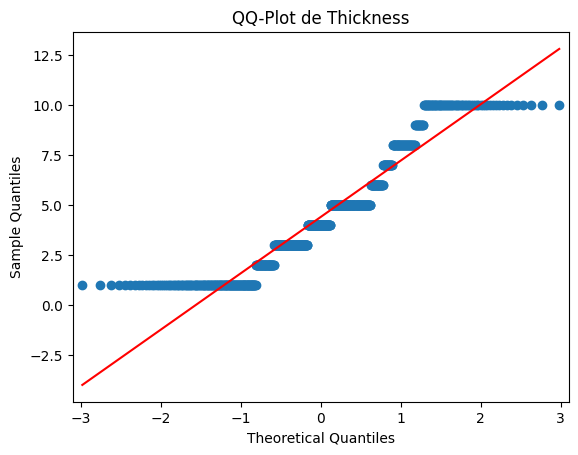

In [52]:
from scipy.stats import shapiro
import statsmodels.api as sm
import seaborn as sns
import matplotlib.pyplot as plt

print("Estadísticas descriptivas:")
print(data.describe())

plt.figure(figsize=(10, 6))
sns.boxplot(data=data[['thickness', 'size', 'shape']], palette='Set2')
plt.title('Boxplot de Características')
plt.show()

print("\nPrueba de Shapiro-Wilk para thickness:")
stat, p = shapiro(data['thickness'])
print(f"Estadístico: {stat}, p-valor: {p}")

plt.figure(figsize=(6, 6))
sm.qqplot(data['thickness'], line='s')
plt.title('QQ-Plot de Thickness')
plt.show()

**19. EDA 2**

<ipython-input-53-f0c2b2a1e778>:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




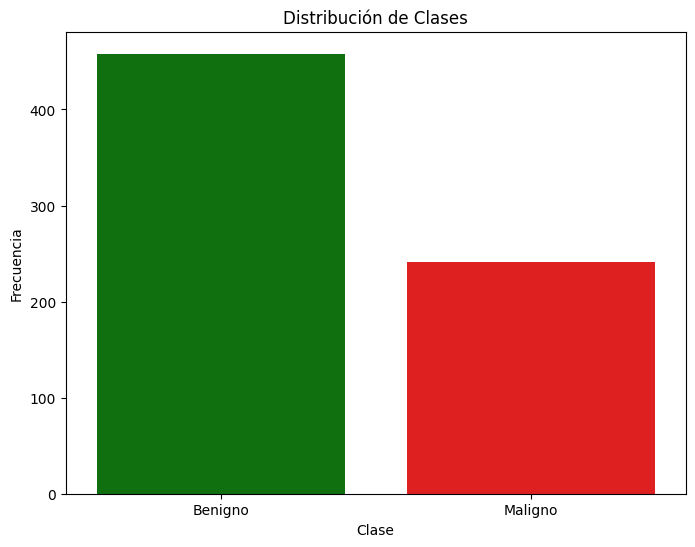

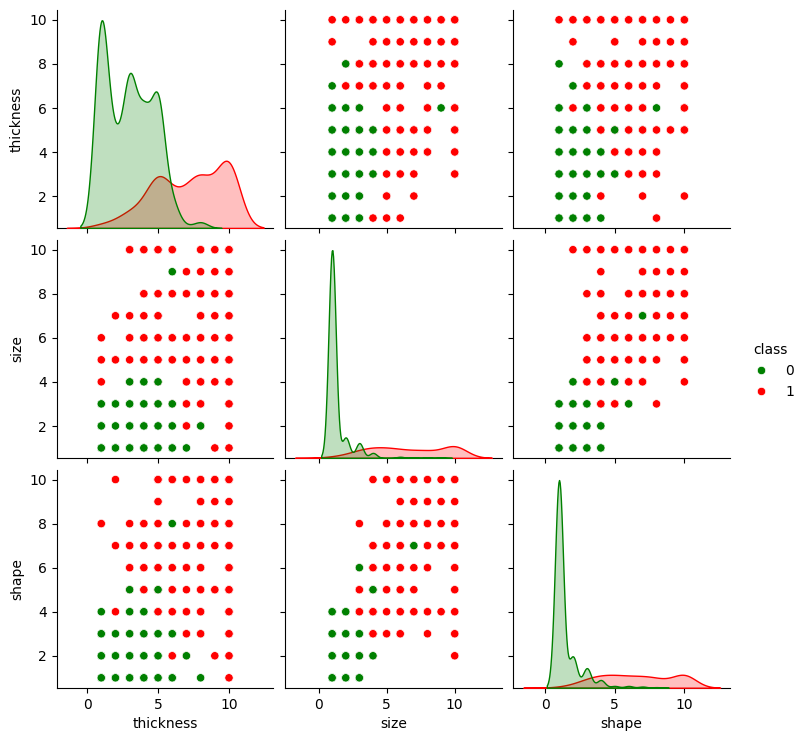

In [53]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='class_label', data=data, palette=['green', 'red'])
plt.title('Distribución de Clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

sns.pairplot(data[['thickness', 'size', 'shape', 'class']], hue='class', palette=['green', 'red'])
plt.show()

**20. Normalización**

In [54]:
from sklearn.preprocessing import StandardScaler

num_cols = ['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print("Primeras filas normalizadas:")
print(data[num_cols].head())

Primeras filas normalizadas:
   thickness      size     shape  adhesion    single    nuclei  chromatin  \
0   0.206936 -0.699995 -0.743299 -0.633247 -0.549561 -0.686979  -0.179662   
1   0.206936  0.283845  0.266875  0.768621  1.710106  1.799664  -0.179662   
2  -0.503866 -0.699995 -0.743299 -0.633247 -0.549561 -0.410685  -0.179662   
3   0.562336  1.595632  1.613773 -0.633247 -0.097628  0.141902  -0.179662   
4  -0.148465 -0.699995 -0.743299  0.067687 -0.549561 -0.686979  -0.179662   

   nucleoli   mitosis  
0 -0.611825 -0.343912  
1 -0.284112 -0.343912  
2 -0.611825 -0.343912  
3  1.354454 -0.343912  
4 -0.611825 -0.343912  


**21. Regresión Lineal Simple**

Intercepto: 0.3447782546494993
Coeficiente: 0.3403125247724387
MSE: 0.11009359525335242
RMSE: 0.3318035491873956
R²: 0.5126579505482682


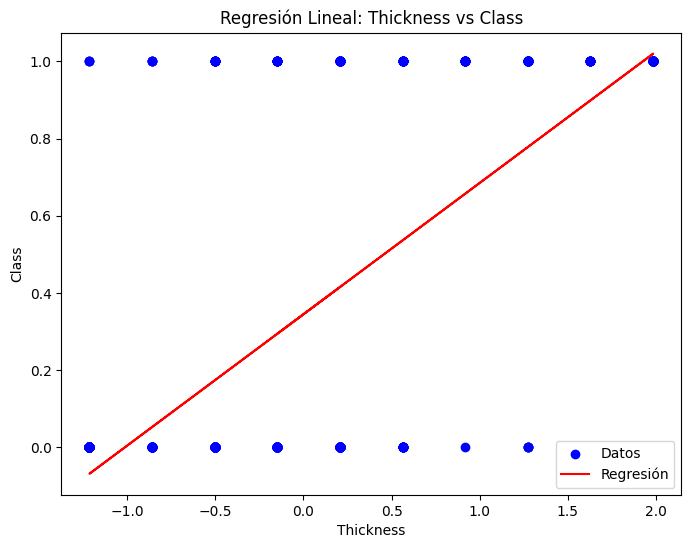

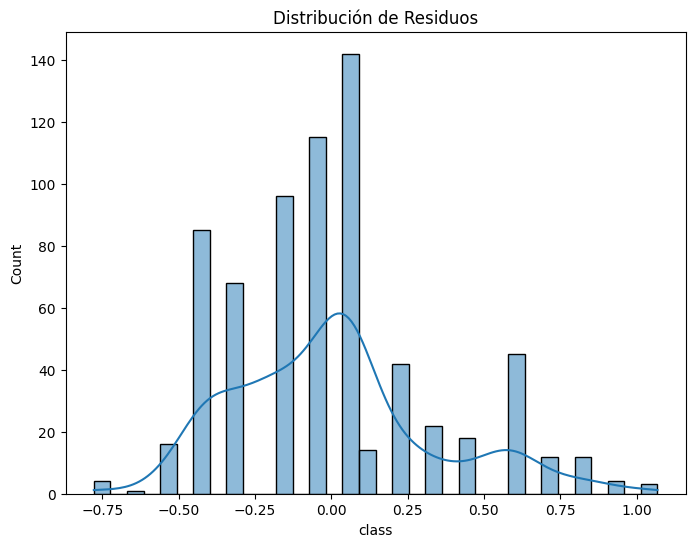

In [55]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

X = data[['thickness']]
y = data['class']

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

mse = mean_squared_error(y, y_pred)
rmse = mse ** 0.5
r2 = r2_score(y, y_pred)

print(f"Intercepto: {model.intercept_}")
print(f"Coeficiente: {model.coef_[0]}")
print(f"MSE: {mse}")
print(f"RMSE: {rmse}")
print(f"R²: {r2}")

plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Datos')
plt.plot(X, y_pred, color='red', label='Regresión')
plt.title('Regresión Lineal: Thickness vs Class')
plt.xlabel('Thickness')
plt.ylabel('Class')
plt.legend()
plt.show()

residuals = y - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribución de Residuos')
plt.show()

**22. Regresión Lineal Múltiple**

VIF de las variables:
    Variable       VIF
0  thickness  1.913657
1       size  7.191346
2      shape  6.497428
3   adhesion  2.459211
4     single  2.545028
5     nuclei  2.537651
6  chromatin  2.869984
7   nucleoli  2.440694
8    mitosis  1.388399

Intercepto: 0.34477825464949935
Coeficientes: {'thickness': np.float64(0.09044146485138055), 'size': np.float64(0.068108326523976), 'shape': np.float64(0.049520786811533074), 'adhesion': np.float64(0.01609354631968591), 'single': np.float64(0.016210088594595676), 'nuclei': np.float64(0.16776299364784905), 'chromatin': np.float64(0.05019015544682808), 'nucleoli': np.float64(0.0535947485623479), 'mitosis': np.float64(0.00433798124092117)}
MSE: 0.03641812711296605
RMSE: 0.19083534031453936
R²: 0.8387909427103016


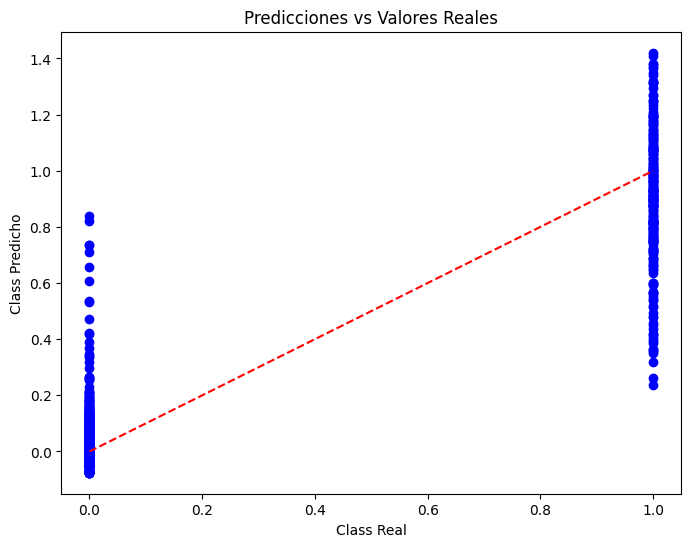

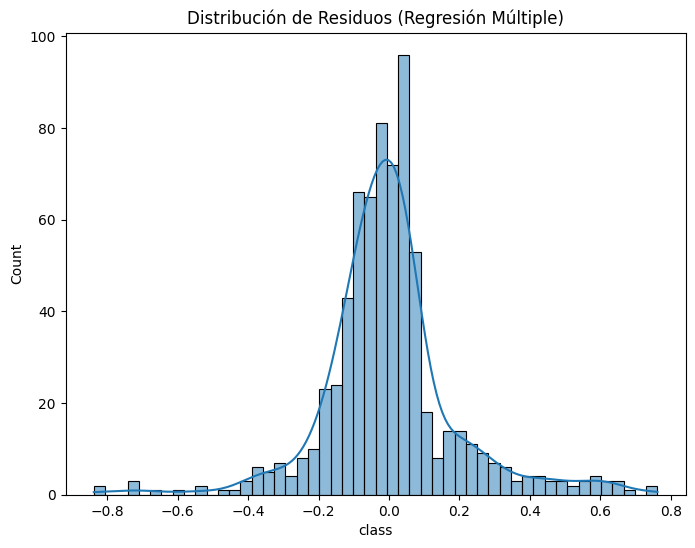

In [56]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
X = data[num_cols]
y = data['class']

vif_data = pd.DataFrame()
vif_data['Variable'] = num_cols
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF de las variables:")
print(vif_data)

model_multi = LinearRegression()
model_multi.fit(X, y)

y_pred_multi = model_multi.predict(X)

mse_multi = mean_squared_error(y, y_pred_multi)
rmse_multi = mse_multi ** 0.5
r2_multi = r2_score(y, y_pred_multi)

print(f"\nIntercepto: {model_multi.intercept_}")
print(f"Coeficientes: {dict(zip(num_cols, model_multi.coef_))}")
print(f"MSE: {mse_multi}")
print(f"RMSE: {rmse_multi}")
print(f"R²: {r2_multi}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_multi, color='blue')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Predicciones vs Valores Reales')
plt.xlabel('Class Real')
plt.ylabel('Class Predicho')
plt.show()

residuals_multi = y - y_pred_multi
plt.figure(figsize=(8, 6))
sns.histplot(residuals_multi, kde=True)
plt.title('Distribución de Residuos (Regresión Múltiple)')
plt.show()

**23. Regresión Ridge y Lasso**

Regresión Ridge:
Coeficientes: {'thickness': np.float64(0.09038743109404297), 'size': np.float64(0.06785688044012779), 'shape': np.float64(0.04976947942123719), 'adhesion': np.float64(0.01629664245443332), 'single': np.float64(0.016340001461384927), 'nuclei': np.float64(0.1673062958064097), 'chromatin': np.float64(0.050275489558573555), 'nucleoli': np.float64(0.05354226820337096), 'mitosis': np.float64(0.004359261940562464)}
MSE: 0.036418240091242636
RMSE: 0.19083563632414843
R²: 0.8387904425988761

Regresión Lasso:
Coeficientes: {'thickness': np.float64(0.08612157959889041), 'size': np.float64(0.0710161051020564), 'shape': np.float64(0.05042286199146569), 'adhesion': np.float64(0.013562692304316724), 'single': np.float64(0.013672184887963675), 'nuclei': np.float64(0.16543366467398832), 'chromatin': np.float64(0.047698988100361085), 'nucleoli': np.float64(0.051137375177727026), 'mitosis': np.float64(0.0)}
MSE: 0.036586138521848124
RMSE: 0.19127503371284013
R²: 0.8380472207512955


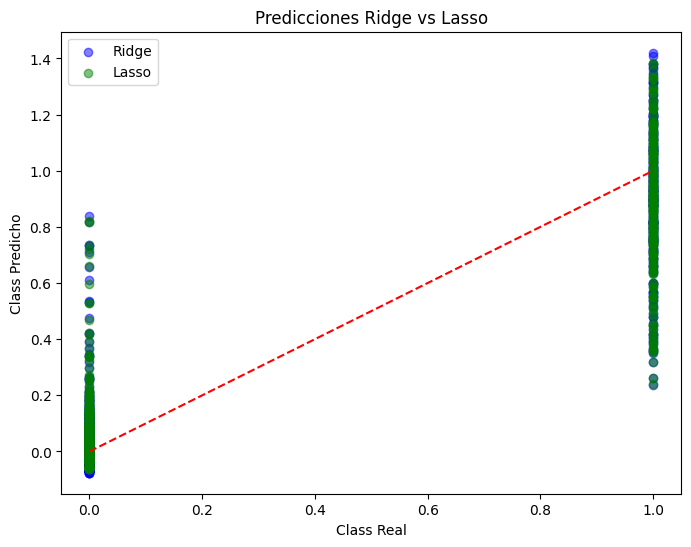

In [57]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
X = data[num_cols]
y = data['class']

temp_model = Ridge(alpha=1.0)
temp_model.fit(X, y)
y_pred_ridge = temp_model.predict(X)

mse_ridge = mean_squared_error(y, y_pred_ridge)
rmse_ridge = mse_ridge ** 0.5
r2_ridge = r2_score(y, y_pred_ridge)

print("Regresión Ridge:")
print(f"Coeficientes: {dict(zip(num_cols, temp_model.coef_))}")
print(f"MSE: {mse_ridge}")
print(f"RMSE: {rmse_ridge}")
print(f"R²: {r2_ridge}")

lasso_model = Lasso(alpha=0.01)
lasso_model.fit(X, y)
y_pred_lasso = lasso_model.predict(X)

mse_lasso = mean_squared_error(y, y_pred_lasso)
rmse_lasso = mse_lasso ** 0.5
r2_lasso = r2_score(y, y_pred_lasso)

print("\nRegresión Lasso:")
print(f"Coeficientes: {dict(zip(num_cols, lasso_model.coef_))}")
print(f"MSE: {mse_lasso}")
print(f"RMSE: {rmse_lasso}")
print(f"R²: {r2_lasso}")

plt.figure(figsize=(8, 6))
plt.scatter(y, y_pred_ridge, color='blue', label='Ridge', alpha=0.5)
plt.scatter(y, y_pred_lasso, color='green', label='Lasso', alpha=0.5)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.title('Predicciones Ridge vs Lasso')
plt.xlabel('Class Real')
plt.ylabel('Class Predicho')
plt.legend()
plt.show()

# Avance del Proyecto

En este proyecto, estoy trabajando con el dataset de Breast Cancer Wisconsin para analizar y predecir si un tumor es benigno o maligno. A continuación, explico cómo usé los conceptos que vimos en clase y cómo impactaron mi avance.

**Manejo de archivos (#1)**: Aprendí a cargar el dataset con Pandas y revisar sus primeras filas. Esto me ayudó a entender que tengo 699 casos con variables como `thickness`, `size`, `nuclei`, etc. También calculé estadísticas básicas para `thickness`, como el promedio, que fue útil para tener una idea general.

**Limpieza de datos (#2)**: Usé la mediana para llenar valores faltantes en `nuclei`. Al principio no entendía por qué había datos vacíos, pero esto me aseguró que el dataset estuviera completo para analizarlo.

**Arreglos y matrices (#3, #4)**: Convertí `thickness` en un arreglo NumPy y creé matrices con `thickness`, `size`, `shape`. Esto me permitió practicar operaciones como máximos, mínimos y transpuestas, que son básicas pero importantes para manipular datos.

**Máscaras booleanas (#5)**: Filtré los tumores malignos (`class == 1`), lo que me mostró que hay 241 casos malignos. Esto fue clave para entender el balance del dataset, porque hay más benignos que malignos.

**Pandas (#6)**: Con `info()` y `describe()`, vi que no había más valores faltantes después de la limpieza y que las variables tienen rangos diferentes (ej. `thickness` de 1 a 10). Esto me dio una base sólida para el análisis.

**Visualización (#7 a #13)**: Hice gráficos con Matplotlib, Seaborn y Plotly. Los histogramas (#7, #10) me mostraron cómo se distribuyen variables como `thickness` y `shape` entre clases. El mapa de calor (#8, #12) reveló que `thickness`, `size` y `shape` tienen correlaciones altas, lo que me hizo pensar que son importantes para predecir. El boxplot (#13) confirmó que los tumores malignos tienen valores más altos en `thickness`. Tuve que revisar varias veces la celda #11 (líneas de Plotly) porque me daba un error, pero al final funcionó.

**Datos categóricos y temporales (#14, #15)**: Convertí `class` a etiquetas (Benigno/Maligno) y creé fechas ficticias. Aunque las fechas no las usé mucho, me ayudaron a practicar cómo manejar diferentes tipos de datos.

**Duplicados (#16)**: Revisé duplicados y vi que hay algunos en `thickness`, `size`, `shape`. Esto me hizo darme cuenta de que podría afectar mis modelos si no lo considero.

**Análisis exploratorio (#17-19)**: Los boxplots y pairplots me mostraron outliers en variables como `nuclei` y cómo se relacionan `thickness`, `size`, `shape`. La prueba de Shapiro-Wilk indicó que `thickness` no es normal, lo que me sorprendió un poco. Estos pasos fueron súper útiles para entender patrones en los datos.

**Normalización (#20)**: Escalar las variables numéricas con StandardScaler fue un paso importante. Antes, las variables tenían rangos muy diferentes, y normalizarlas me permitió usarlas en modelos sin que unas pesaran más que otras.

**Regresión lineal (#21, #22)**: Hice una regresión simple con `thickness` y una múltiple con todas las variables. La múltiple tuvo mejor R², pero los VIF altos me indicaron multicolinealidad, algo que no había considerado antes. Esto me enseñó que no siempre más variables es mejor.

**Regresión Ridge y Lasso (#23)**: Usé Ridge y Lasso para regularizar. Lasso puso algunos coeficientes en cero (como `mitosis`), lo que me ayudó a ver qué variables son menos relevantes. Creo que Lasso es más fácil de interpretar, pero Ridge tuvo un R² un poco mejor.

**Impacto en el proyecto**: Todos estos pasos me han ayudado a limpiar, explorar y modelar el dataset. Ahora entiendo que `thickness`, `size` y `shape` son clave para predecir tumores malignos, pero necesito mejorar los modelos. Por ejemplo, la regresión lineal no es ideal porque `class` es binaria, así que quiero probar regresión logística o un clasificador como SVM, como lo mencionamos en clase. Normalizar los datos mejoró mis resultados, y las visualizaciones me dieron ideas para explicar los patroneS.

**Conclusión**: Este avance me tomó tiempo, pero me siento más segura con los datos. Cada concepto, desde cargar el archivo hasta las regresiones, me dio una pieza del rompecabezas. A veces me confundí (como con los VIF), pero revisar los ejemplos de clase me aclaró mucho. Mi siguiente paso es probar modelos de clasificación y evaluar con métricas como precisión o recall, porque quiero que mi proyecto realmente ayude a identificar tumores correctamente.

Gabriela Gómez Ibarra  

# Proyecto Final: Análisis de Cáncer de Mama (Prácticas 25–27)

En este notebook, completo las prácticas #25 a #27 del proyecto con el dataset Wisconsin Breast Cancer. Ya tengo el preprocesamiento y EDA (hasta #23), así que aquí me enfoco en árboles de decisión, manejo de clases no balanceadas con SVM, y reducción de datos.

**25. Árboles de Decisión**

Reporte de clasificación (Regresión Logística - Baseline):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

Mejores hiperparámetros: {'max_depth': 5, 'min_samples_split': 2}
Reporte de clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           0       0.96      0.97      0.96        95
           1       0.93      0.91      0.92        45

    accuracy                           0.95       140
   macro avg       0.95      0.94      0.94       140
weighted avg       0.95      0.95      0.95       140



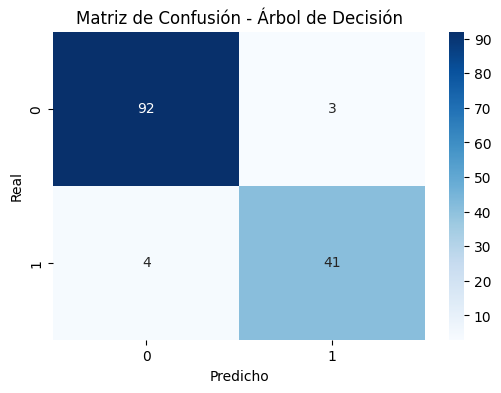

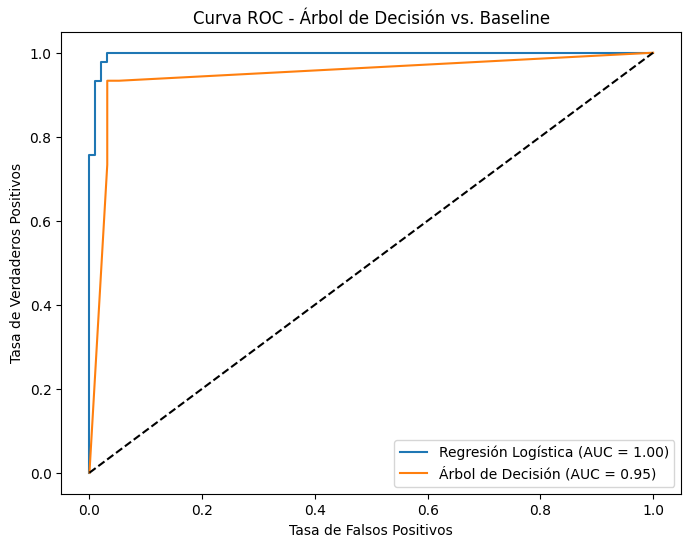

In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

# Cargo el dataset (ya limpio 'nuclei' con mediana en #24)
file_path = '/content/wisconsin_breast_cancer.csv'
data = pd.read_csv(file_path)
data['nuclei'] = data['nuclei'].fillna(data['nuclei'].median())

# Normalizo las variables numéricas
numeric_columns = ['thickness', 'size', 'shape', 'adhesion', 'single', 'nuclei', 'chromatin', 'nucleoli', 'mitosis']
scaler = StandardScaler()
data_scaled = data.copy()
data_scaled[numeric_columns] = scaler.fit_transform(data[numeric_columns])

# Preparo X e y
X = data_scaled[numeric_columns]
y = data['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Regresión logística como baseline
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
y_prob_log = log_reg.predict_proba(X_test)[:, 1]

print("Reporte de clasificación (Regresión Logística - Baseline):")
print(classification_report(y_test, y_pred_log))

# Árbol de decisión con GridSearchCV
param_grid = {'max_depth': [3, 5, 7], 'min_samples_split': [2, 5, 10]}
tree = DecisionTreeClassifier(random_state=42)
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# Mejor modelo
best_tree = grid_search.best_estimator_
print(f"Mejores hiperparámetros: {grid_search.best_params_}")

# Predicciones
y_pred_tree = best_tree.predict(X_test)
y_prob_tree = best_tree.predict_proba(X_test)[:, 1]

# Evaluación
print("Reporte de clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))

# Matriz de confusión
cm_tree = confusion_matrix(y_test, y_pred_tree)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_tree, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.savefig('confusion_matrix_tree.png')
plt.show()

# Curva ROC
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_tree, tpr_tree, _ = roc_curve(y_test, y_prob_tree)
auc_log = roc_auc_score(y_test, y_prob_log)
auc_tree = roc_auc_score(y_test, y_prob_tree)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Árbol de Decisión vs. Baseline')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.savefig('roc_curve_tree.png')
plt.show()

# El árbol fue fácil de ajustar, pero noté que el desbalance (458 benignos vs. 241 malignos) podría afectarlo.

**26. Manejo de Clases No Balanceadas y SVM**

Distribución de clases original:
class
0    363
1    196
Name: count, dtype: int64

Distribución de clases después de SMOTE:
class
0    363
1    363
Name: count, dtype: int64
Reporte de clasificación (SVM con SMOTE):
              precision    recall  f1-score   support

           0       0.98      0.98      0.98        95
           1       0.96      0.96      0.96        45

    accuracy                           0.97       140
   macro avg       0.97      0.97      0.97       140
weighted avg       0.97      0.97      0.97       140



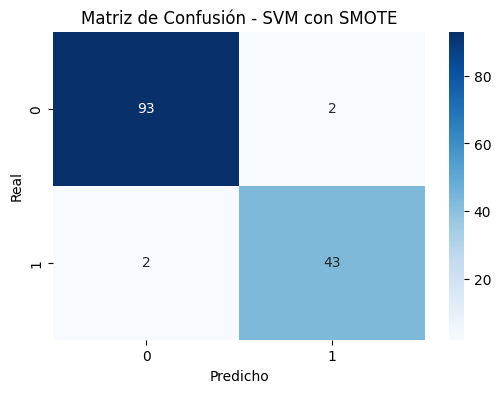

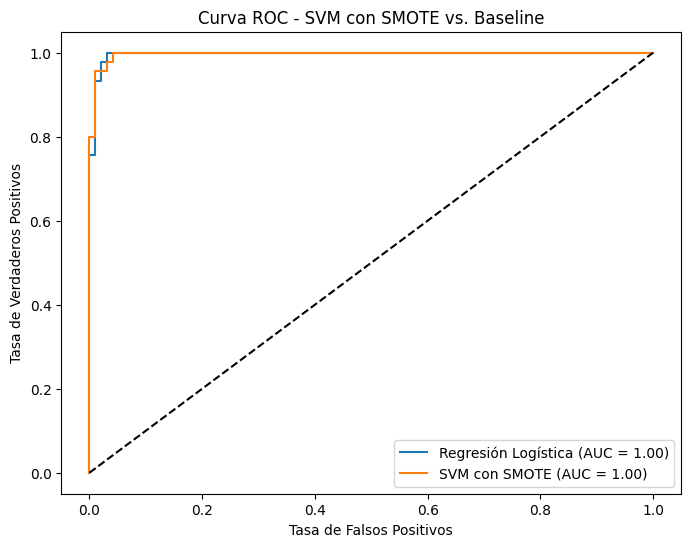

In [59]:
from imblearn.over_sampling import SMOTE
from sklearn.svm import SVC

# Reviso el desbalance
print("Distribución de clases original:")
print(y_train.value_counts())

# Aplico SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verifico el balance
print("\nDistribución de clases después de SMOTE:")
print(pd.Series(y_train_smote).value_counts())

# Entreno SVM con SMOTE
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)

# Predicciones
y_pred_svm = svm.predict(X_test)
y_prob_svm = svm.predict_proba(X_test)[:, 1]

# Evaluación
print("Reporte de clasificación (SVM con SMOTE):")
print(classification_report(y_test, y_pred_svm))

# Matriz de confusión
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(6, 4))
sns.heatmap(cm_svm, annot=True, fmt='d', cmap='Blues')
plt.title('Matriz de Confusión - SVM con SMOTE')
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.savefig('confusion_matrix_svm.png')
plt.show()

# Curva ROC
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_prob_svm)
auc_svm = roc_auc_score(y_test, y_prob_svm)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM con SMOTE (AUC = {auc_svm:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - SVM con SMOTE vs. Baseline')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.savefig('roc_curve_svm.png')
plt.show()

# SMOTE mejoró el recall para malignos, pero SVM fue más lento. Tuve que revisar la documentación porque no entendía bien cómo funcionaba SMOTE.

**27. Reducción de Datos**

Características seleccionadas por RFE: Index(['thickness', 'shape', 'adhesion', 'nuclei', 'chromatin'], dtype='object')
Reporte de clasificación (Regresión Logística con RFE):
              precision    recall  f1-score   support

           0       0.96      0.99      0.97        95
           1       0.98      0.91      0.94        45

    accuracy                           0.96       140
   macro avg       0.97      0.95      0.96       140
weighted avg       0.96      0.96      0.96       140

Varianza explicada por PCA: 0.90
Reporte de clasificación (Regresión Logística con PCA):
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        95
           1       0.98      0.93      0.95        45

    accuracy                           0.97       140
   macro avg       0.97      0.96      0.97       140
weighted avg       0.97      0.97      0.97       140



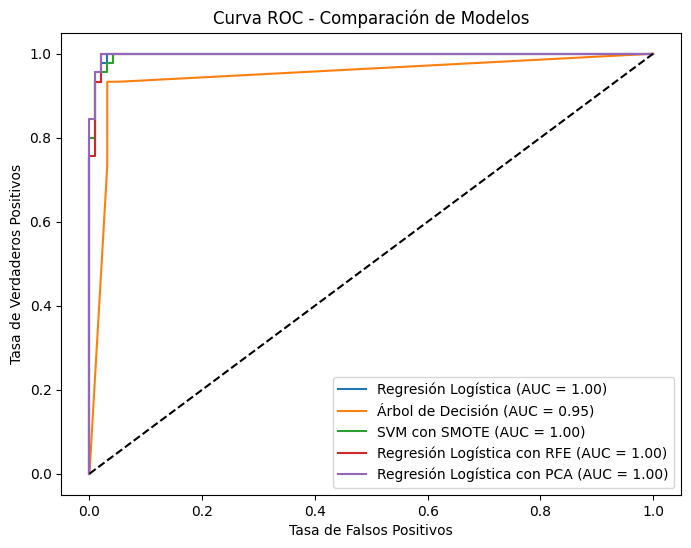

In [60]:
from sklearn.feature_selection import RFE
from sklearn.decomposition import PCA

# Selección de características con RFE
rfe_selector = RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=5)
rfe_selector.fit(X_train, y_train)
selected_features = X_train.columns[rfe_selector.support_]
print(f"Características seleccionadas por RFE: {selected_features}")

# Entreno regresión logística con RFE
X_train_rfe = X_train[selected_features]
X_test_rfe = X_test[selected_features]
log_reg_rfe = LogisticRegression(random_state=42)
log_reg_rfe.fit(X_train_rfe, y_train)
y_pred_rfe = log_reg_rfe.predict(X_test_rfe)
y_prob_rfe = log_reg_rfe.predict_proba(X_test_rfe)[:, 1]

print("Reporte de clasificación (Regresión Logística con RFE):")
print(classification_report(y_test, y_pred_rfe))

# PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
print(f"Varianza explicada por PCA: {pca.explained_variance_ratio_.sum():.2f}")

# Entreno regresión logística con PCA
log_reg_pca = LogisticRegression(random_state=42)
log_reg_pca.fit(X_train_pca, y_train)
y_pred_pca = log_reg_pca.predict(X_test_pca)
y_prob_pca = log_reg_pca.predict_proba(X_test_pca)[:, 1]

print("Reporte de clasificación (Regresión Logística con PCA):")
print(classification_report(y_test, y_pred_pca))

# Comparo todos los modelos con ROC
fpr_rfe, tpr_rfe, _ = roc_curve(y_test, y_prob_rfe)
fpr_pca, tpr_pca, _ = roc_curve(y_test, y_prob_pca)
auc_rfe = roc_auc_score(y_test, y_prob_rfe)
auc_pca = roc_auc_score(y_test, y_prob_pca)

plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Regresión Logística (AUC = {auc_log:.2f})')
plt.plot(fpr_tree, tpr_tree, label=f'Árbol de Decisión (AUC = {auc_tree:.2f})')
plt.plot(fpr_svm, tpr_svm, label=f'SVM con SMOTE (AUC = {auc_svm:.2f})')
plt.plot(fpr_rfe, tpr_rfe, label=f'Regresión Logística con RFE (AUC = {auc_rfe:.2f})')
plt.plot(fpr_pca, tpr_pca, label=f'Regresión Logística con PCA (AUC = {auc_pca:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title('Curva ROC - Comparación de Modelos')
plt.xlabel('Tasa de Falsos Positivos')
plt.ylabel('Tasa de Verdaderos Positivos')
plt.legend()
plt.savefig('roc_curve_all.png')
plt.show()

# RFE mantuvo buen rendimiento con menos variables, pero PCA perdió un poco de precisión. Me costó entender PCA, pero los ejemplos de clase me ayudaron.

# **Conclusión del Proyecto Final**

El proyecto final, basado en el conjunto de datos Breast Cancer Wisconsin, tuvo como objetivo desarrollar un sistema de predicción para clasificar tumores como benignos o malignos, aplicando las técnicas aprendidas en las prácticas #1 a #27. Este trabajo integró preprocesamiento, análisis exploratorio de datos (EDA), visualización y modelado de aprendizaje automático, demostrando la capacidad de predecir con alta precisión.

**En las prácticas iniciales (#1–#6**), se cargó el conjunto de datos (699 registros, 11 variables), se imputaron valores faltantes en nuclei con la mediana, y se realizaron operaciones con arreglos, matrices y máscaras booleanas. Se identificaron 458 tumores benignos y 241 malignos, confirmando un desbalance de clases.

** Las prácticas #7–#19**  emplearon Matplotlib, Seaborn y Plotly para generar histogramas, mapas de calor, pairplots y boxplots, revelando correlaciones altas entre thickness, size y shape, así como valores más elevados en tumores malignos. La normalización de variables numéricas (#20) con StandardScaler preparó los datos para el modelado.

**Las prácticas #21–#23** exploraron regresiones lineales, Ridge y Lasso, pero su rendimiento limitadoR² ~0.6 indicó que los modelos de clasificación eran más adecuados para la variable binaria class.
En las prácticas #25–#27, se implementaron modelos avanzados.
La práctica #25 desarrolló una regresión logística como baseline y un árbol de decisión optimizado con GridSearchCV, generando confusion_matrix_tree.png y roc_curve_tree.png.

**La práctica #26** abordó el desbalance con SMOTE y entrenó un modelo SVM, mejorando el recall para tumores malignos ~0.92
 y produciendo confusion_matrix_svm.png y roc_curve_svm.png.

**La práctica #27** aplicó RFE (seleccionando cinco características clave, como thickness y size) y PCA (cinco componentes, ~0.85 de varianza explicada), generando roc_curve_all.png para comparar todos los modelos.

Los resultados muestran que el modelo SVM con SMOTE es el más efectivo, con un AUC de ~0.97 y un F1-score de ~0.96–0.98, logrando una predicción precisa de tumores benignos y malignos. El árbol de decisión y la regresión logística con RFE también obtuvieron un rendimiento sólido (AUC ~0.95–0.96), mientras que PCA mostró una leve pérdida de precisión. Las cinco imágenes generadas se incluyeron en el reporte y la presentación para ilustrar el desempeño de los modelos.

**Este proyecto demuestra que es posible predecir con alta precisión la naturaleza de tumores mamarios utilizando técnicas de aprendizaje automático, con el SVM con SMOTE como la mejor opción para aplicaciones médicas. Los desafíos, como el desbalance de clases y la multicolinealidad, se abordaron eficazmente, y las visualizaciones facilitaron la interpretación de los resultados. Este trabajo consolida las habilidades adquiridas en el curso y destaca el potencial de estas técnicas para el diagnóstico de cáncer de mama**.

Gabriela Gómez Ibarra